In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import meteostat
import pickle
import upsetplot

In [2]:
def calculate_shannon_diversity_from_proportions(abundance_array):
    """Calculate Shannon diversity index from an array of proportions."""
    # Filter out zero proportions to avoid log(0)
    filtered_abundance = abundance_array[abundance_array > 0]
    shannon_index = -np.sum(filtered_abundance * np.log(filtered_abundance))
    return shannon_index

In [3]:
transcriptome = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv",
    index_col=0,
)
rows_to_drop_expression_data = [
    "A2450525897_n01_undetermined",
    "A2449446903_n01_undetermined",
    "B250508004_n01_undetermined",
    "B2449500127_n01_undetermined",
]
transcriptome = transcriptome.drop(index=rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()

In [4]:
metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

In [5]:
unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",
]
borderline_unusable = [
    "A2450525897_n01_LICRNA01_F03",
    "A2450525897_n01_LICRNA01_G07",
    "A2449446903_n01_LICRNA02_A04",
    "A2449446903_n01_LICRNA02_H10",
    "B2449500127_n01_LICRNA04_H02",
    "B2449500127_n01_LICRNA04_H11",
]
all_unsable = borderline_unusable + unusable_samples

In [6]:
trimmed_transcriptome = transcriptome.drop(index=all_unsable)
trimmed_metadata = metadata.drop(index=all_unsable)

In [7]:
long_term_transcriptome = trimmed_transcriptome.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]
long_term_metadata = trimmed_metadata.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]

In [8]:
groupby_timepoint = long_term_transcriptome.groupby(
    long_term_metadata["timepoint"]
).mean()
# groupby_timepoint = groupby_timepoint.loc[:, (groupby_timepoint  == 0).mean() < .5] ## At least half of timepoints are non zero (slighlty unintuitive because ==0 makes zeros 1)
groupby_timepoint = groupby_timepoint.loc[
    :, (groupby_timepoint > 1).mean() > 0.5
]  ## At least half of timepoints bigger than 1
groupby_timepoint

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ArthCt115,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp085
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,4.178007,5.437430,2.605825,4.439901,50.977363,13.004802,1.589169,9.734259,65.657436,1104.330609,...,5.059142,3.336826,43.520549,122.823875,8.980496,6.651848,21.939469,0.000000,0.161073,0.965547
t02,0.940355,7.298013,3.842908,4.463269,25.168823,47.655766,0.571242,12.908019,75.165515,845.754056,...,0.000000,6.497311,6.751200,130.786877,4.160837,0.244885,21.553952,3.428396,0.037675,1.325997
t03,1.783955,7.880381,4.144576,4.227300,46.778572,28.141387,3.471598,8.618715,69.239717,932.443238,...,0.000000,0.000000,10.900785,52.858647,5.848172,1.035596,6.500587,0.000000,2.156090,0.972086
t04,3.294595,7.674816,5.922081,5.006461,28.959007,39.972919,1.555315,13.910990,76.747498,1193.770144,...,0.000000,2.551425,6.978923,80.358859,0.000000,3.078758,19.860159,4.717444,4.191593,2.531536
t05,1.695050,6.069584,2.895225,3.362750,40.021234,10.213291,0.867596,8.622884,69.938324,1202.568221,...,1.585753,13.285471,19.211318,49.267266,2.607296,3.691827,10.404960,8.562370,1.142433,1.769217
t06,0.817885,5.963264,2.836390,2.420270,34.425932,8.355582,2.112976,13.958665,54.455711,1211.469894,...,0.892974,4.417069,13.454872,29.321538,13.028191,7.357152,5.552243,1.294320,3.633794,1.578309
t07,1.108656,6.329721,1.828056,3.699847,47.950309,6.811390,1.480485,11.036907,61.290810,1078.977322,...,1.148780,9.625153,12.268870,39.640506,4.836168,4.843796,7.371363,1.893213,3.312303,2.210424
t08,0.432387,4.034252,1.315234,2.412136,37.309378,12.520038,0.617279,11.512825,46.354285,540.282869,...,2.029913,5.147805,18.927096,76.691200,10.530133,7.631265,6.334308,3.134487,4.265254,2.934250
t09,0.892427,6.731354,1.876925,2.804225,38.215024,4.794368,1.310240,9.041800,46.638535,704.253630,...,5.692243,13.258177,8.966486,36.647809,11.555561,10.159008,6.338279,2.003623,2.928722,1.937635


In [9]:
microbiome_abundance = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/Microbiome/lic2024_16S_rab.csv"
)
long_term_microbiome = microbiome_abundance.merge(
    metadata[["sampID", "Experiment Type"]], left_on="plantID", right_on="sampID"
)
long_term_microbiome = long_term_microbiome.loc[
    long_term_microbiome["Experiment Type"] == "Long Term"
]
long_term_microbiome

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100,sampID,Experiment Type
1,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,66.1,LIC063,Long Term
2,LIC159,plant,t14,1/23/24,8:00,LIC_02,83,LIC159,d__Bacteria,Cyanobacteriota,Cyanobacteriia,Cyanobacteriales,Coleofasciculaceae,Caldora,Caldora sp010672925,60.5,LIC159,Long Term
4,LIC306,plant,t26,3/8/24,8:00,LIC_04,128,LIC306,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,57.2,LIC306,Long Term
5,LIC016,plant,t02,11/7/23,8:00,LIC_01,6,LIC016,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,54.4,LIC016,Long Term
9,LIC051,plant,t05,11/21/23,8:00,LIC_01,20,LIC051,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Rhizobiaceae,Neorhizobium_500197,Neorhizobium soli,49.7,LIC051,Long Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,LIC157,plant,t14,1/23/24,8:00,LIC_02,83,LIC157,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Propionibacteriaceae,Friedmanniella,Friedmanniella luteola,0.5,LIC157,Long Term
12280,LIC195,plant,t17,2/2/24,8:00,LIC_03,93,LIC195,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Propionibacteriaceae,Friedmanniella,Friedmanniella flava,0.5,LIC195,Long Term
12281,LIC122,plant,t11,12/15/23,8:00,LIC_02,44,LIC122,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 hankookensis,0.5,LIC122,Long Term
12282,LIC028,plant,t03,11/14/23,8:00,LIC_01,13,LIC028,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Geodermatophilaceae,Modestobacter,Modestobacter muralis,0.5,LIC028,Long Term


In [10]:
long_term_microbiome.loc[long_term_microbiome["Sample"] == "LIC063"]

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100,sampID,Experiment Type
1,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,66.1,LIC063,Long Term
3022,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 dongxiaopingii,2.6,LIC063,Long Term
3230,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Pseudonocardiaceae,Actinomycetospora,Actinomycetospora chiangmaiensis,2.4,LIC063,Long Term
3316,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Kordiimonadaceae,Kordiimonas,Kordiimonas sp002401685,2.3,LIC063,Long Term
3526,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Geodermatophilaceae,Klenkia,Klenkia sp001424455,2.2,LIC063,Long Term
4509,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales_A_650611,Pseudomonadaceae,Pseudomonas_E_647464,Pseudomonas_E_647464 avellanae,1.6,LIC063,Long Term
4585,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 yunnanensis,1.6,LIC063,Long Term
5317,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Rhizobiaceae,Neorhizobium_500197,Neorhizobium soli,1.3,LIC063,Long Term
5434,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Actinomycetota,Actinomycetes,Actinomycetales,Microbacteriaceae,Microbacterium_A_383321,Microbacterium_A_383321 sp000333395,1.3,LIC063,Long Term
5655,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 halotolerans,1.2,LIC063,Long Term


In [11]:
genus_sum = (
    long_term_microbiome[["Sample", "Genus", "AbundR100"]]
    .groupby(["Sample", "Genus"])
    .sum()
)
genus_sum = genus_sum.reset_index()

genus_sum_w_tp = genus_sum.merge(
    metadata[["sampID", "timepoint"]], left_on="Sample", right_on="sampID"
)
genus_sum_w_tp

,Sample,Genus,AbundR100,sampID,timepoint
0,LIC001,Actinomycetospora,0.6,LIC001,t01
1,LIC001,Actinoplanes,1.1,LIC001,t01
2,LIC001,Aeromicrobium,0.8,LIC001,t01
3,LIC001,Blastococcus,1.7,LIC001,t01
4,LIC001,Caulobacter_487784,0.5,LIC001,t01
...,...,...,...,...,...
5098,LIC368,Pseudoduganella_570666,0.5,LIC368,t08
5099,LIC368,Pseudomonas_E_647464,2.6,LIC368,t08
5100,LIC368,Rhodoferax_C,6.6,LIC368,t08
5101,LIC368,Sphingomonas_L_486704,19.7,LIC368,t08


In [12]:
genus_sum.set_index(
    "Sample",
    drop=True,
).index.difference(
    genus_sum_w_tp.set_index("Sample", drop=True).index
)  ## Difference is from the dropped samples (due to low quality RNA) which we dont' wanna drop here cause its DNA

Index([], dtype='object', name='Sample')

In [13]:
genus_sum_w_tp.head(40)

,Sample,Genus,AbundR100,sampID,timepoint
0,LIC001,Actinomycetospora,0.6,LIC001,t01
1,LIC001,Actinoplanes,1.1,LIC001,t01
2,LIC001,Aeromicrobium,0.8,LIC001,t01
3,LIC001,Blastococcus,1.7,LIC001,t01
4,LIC001,Caulobacter_487784,0.5,LIC001,t01
5,LIC001,Chryseobacterium_A_796612,0.6,LIC001,t01
6,LIC001,Curtobacterium,1.0,LIC001,t01
7,LIC001,Dactylopiibacterium,0.7,LIC001,t01
8,LIC001,Flavobacterium,0.8,LIC001,t01
9,LIC001,Friedmanniella,2.7,LIC001,t01


In [14]:
all_present_genus = genus_sum_w_tp["Genus"].unique()
all_present_genus

array(['Actinomycetospora', 'Actinoplanes', 'Aeromicrobium',
       'Blastococcus', 'Caulobacter_487784', 'Chryseobacterium_A_796612',
       'Curtobacterium', 'Dactylopiibacterium', 'Flavobacterium',
       'Friedmanniella', 'Frigoribacterium', 'Geodermatophilus',
       'Herbaspirillum', 'Hylemonella', 'Kineococcus', 'Kineosporia',
       'Klenkia', 'Kordiimonas', 'Massilia_574544', 'Methylobacterium',
       'Methylophilus', 'Microbacterium_A_383321', 'Nakamurella',
       'Neorhizobium_500197', 'Nocardioides_A_392796',
       'Pseudoduganella_570666', 'Pseudomonas_B_650453',
       'Pseudomonas_E_647464', 'Pseudomonas_E_647626', 'Rhodoferax_C',
       'Solirubrobacter', 'Sphingomonas_L_486704', 'Telluria_573210',
       'Variovorax', 'Arthrobacter_E_385446', 'Arthrobacter_E_385777',
       'Caballeronia', 'Marmoricola_A_392027', 'Massilia_574424',
       'Microlunatus_B', 'Nocardioides_A_392805',
       'Noviherbaspirillum_A_568106', 'Paucimonas', 'Pedococcus',
       'Pseudodugane

In [15]:
genus_sum_w_tp

,Sample,Genus,AbundR100,sampID,timepoint
0,LIC001,Actinomycetospora,0.6,LIC001,t01
1,LIC001,Actinoplanes,1.1,LIC001,t01
2,LIC001,Aeromicrobium,0.8,LIC001,t01
3,LIC001,Blastococcus,1.7,LIC001,t01
4,LIC001,Caulobacter_487784,0.5,LIC001,t01
...,...,...,...,...,...
5098,LIC368,Pseudoduganella_570666,0.5,LIC368,t08
5099,LIC368,Pseudomonas_E_647464,2.6,LIC368,t08
5100,LIC368,Rhodoferax_C,6.6,LIC368,t08
5101,LIC368,Sphingomonas_L_486704,19.7,LIC368,t08


In [16]:
## Need to fill in missing genus in every sample first
for sampID in genus_sum_w_tp["sampID"].unique():
    sampid_only_df = genus_sum_w_tp.loc[genus_sum_w_tp["sampID"] == sampID]
    present_genus_in_samp = sampid_only_df["Genus"].unique()
    difference_in_present_bacteria = list(
        set(all_present_genus) - set(present_genus_in_samp)
    )
    current_time_point = sampid_only_df["timepoint"].iloc[0]
    empty_df_to_add = pd.DataFrame(
        columns=["Sample", "Genus", "AbundR100", "sampID", "timepoint"]
    )
    empty_df_to_add["Genus"] = difference_in_present_bacteria
    empty_df_to_add["Sample"] = sampID
    empty_df_to_add["AbundR100"] = 0
    empty_df_to_add["sampID"] = sampID
    empty_df_to_add["timepoint"] = current_time_point
    genus_sum_w_tp = pd.concat([genus_sum_w_tp, empty_df_to_add])

In [17]:
genus_sum_w_tp

,Sample,Genus,AbundR100,sampID,timepoint
0,LIC001,Actinomycetospora,0.6,LIC001,t01
1,LIC001,Actinoplanes,1.1,LIC001,t01
2,LIC001,Aeromicrobium,0.8,LIC001,t01
3,LIC001,Blastococcus,1.7,LIC001,t01
4,LIC001,Caulobacter_487784,0.5,LIC001,t01
...,...,...,...,...,...
109,LIC368,Duganella_570715,0.0,LIC368,t08
110,LIC368,Allorhizobium_500053,0.0,LIC368,t08
111,LIC368,Pseudomonas_E_647626,0.0,LIC368,t08
112,LIC368,Labilithrix,0.0,LIC368,t08


In [18]:
timepoint_average_abundance = (
    genus_sum_w_tp[["Genus", "timepoint", "AbundR100"]]
    .groupby(["Genus", "timepoint"])
    .mean()
)
timepoint_average_abundance = timepoint_average_abundance.reset_index()
timepoint_average_abundance

,Genus,timepoint,AbundR100
0,Abditibacterium,t01,0.0
1,Abditibacterium,t02,0.0
2,Abditibacterium,t03,0.0
3,Abditibacterium,t04,0.0
4,Abditibacterium,t05,0.0
...,...,...,...
3831,Xenophilus_587940,t24,0.0
3832,Xenophilus_587940,t25,0.0
3833,Xenophilus_587940,t26,0.0
3834,Xenophilus_587940,t27,0.0


In [19]:
timepoint_cleaned_average_abundance = timepoint_average_abundance.copy()

In [20]:
for genus in timepoint_cleaned_average_abundance["Genus"].unique():
    genus_df = timepoint_cleaned_average_abundance.loc[
        timepoint_cleaned_average_abundance["Genus"] == genus
    ]
    if sum(genus_df["AbundR100"] > 0) < 10:
        timepoint_cleaned_average_abundance = timepoint_cleaned_average_abundance.loc[
            timepoint_cleaned_average_abundance["Genus"] != genus
        ]

In [21]:
timepoint_all_species_abundance = timepoint_average_abundance.copy()

In [22]:
timepoint_cleaned_average_abundance

,Genus,timepoint,AbundR100
84,Actinomycetospora,t01,0.3750
85,Actinomycetospora,t02,0.5875
86,Actinomycetospora,t03,0.6000
87,Actinomycetospora,t04,0.3000
88,Actinomycetospora,t05,0.3375
...,...,...,...
3747,Variovorax,t24,3.8125
3748,Variovorax,t25,3.8875
3749,Variovorax,t26,3.7500
3750,Variovorax,t27,4.1125


In [23]:
# sns.scatterplot(data = timepoint_average_abundance, x = 'timepoint', y = 'AbundR100',)

In [24]:
timepoint_abundance_matrix = pd.pivot_table(
    timepoint_cleaned_average_abundance,
    values="AbundR100",
    index="timepoint",
    columns="Genus",
)
timepoint_abundance_matrix

Genus,Actinomycetospora,Actinoplanes,Aeromicrobium,Aetherobacter,Agrobacterium,Amnibacterium_382409,Aquabacterium_A_592457,Aureimonas_A_501549,Blastococcus,Brevundimonas,...,Pseudomonas_E_647464,Pseudonocardia,Ramlibacter_588642,Rathayibacter,Rhodoferax_C,Rugamonas_570800,Solirubrobacter,Sphingomonas_L_486704,Telluria_573210,Variovorax
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,0.375000,0.137500,0.7875,0.000000,0.000000,0.062500,0.137500,0.950000,0.662500,1.775000,...,2.087500,0.0000,0.950000,0.062500,3.537500,0.225000,0.362500,27.112500,1.675000,2.362500
t02,0.587500,0.712500,0.3125,0.000000,0.250000,0.112500,0.450000,0.087500,1.400000,0.150000,...,2.337500,0.2125,0.000000,0.062500,2.412500,0.262500,0.475000,33.262500,3.075000,0.737500
t03,0.600000,0.450000,0.1500,0.000000,0.350000,0.150000,0.000000,0.075000,0.275000,0.200000,...,1.662500,0.0625,0.000000,0.687500,3.987500,0.425000,0.062500,30.150000,1.425000,1.800000
t04,0.300000,0.000000,0.1625,0.000000,0.387500,0.200000,0.000000,0.350000,0.875000,0.000000,...,3.825000,0.0000,0.000000,0.462500,3.062500,0.862500,0.275000,28.800000,0.912500,0.950000
t05,0.337500,0.575000,0.0000,0.000000,0.600000,0.812500,0.187500,0.650000,0.637500,1.025000,...,2.650000,0.2750,0.000000,0.062500,2.425000,0.137500,0.100000,21.312500,0.837500,0.637500
t06,0.775000,1.262500,0.6125,0.062500,0.175000,0.175000,0.100000,0.675000,0.112500,0.512500,...,3.812500,0.0000,0.600000,0.087500,3.825000,0.300000,0.162500,29.712500,0.775000,2.612500
t07,0.362500,0.287500,0.0000,0.000000,0.212500,0.087500,0.000000,0.250000,1.162500,0.537500,...,4.300000,0.0000,0.250000,0.537500,2.787500,5.550000,0.075000,25.412500,4.862500,0.875000
t08,0.725000,0.312500,0.0625,0.000000,0.125000,0.200000,0.000000,1.650000,0.200000,0.362500,...,4.587500,0.1125,0.200000,0.162500,5.150000,2.912500,0.000000,18.987500,0.700000,2.012500
t09,0.212500,0.062500,0.1375,0.000000,0.487500,0.075000,0.062500,0.087500,0.325000,0.000000,...,5.575000,0.0000,0.062500,0.362500,5.637500,1.062500,0.075000,17.237500,1.500000,0.975000


In [25]:
all_species_abundance_matrix = pd.pivot_table(
    timepoint_all_species_abundance,
    values="AbundR100",
    index="timepoint",
    columns="Genus",
)
all_species_abundance_matrix

Genus,Abditibacterium,Actinoallomurus,Actinocorallia,Actinomycetospora,Actinoplanes,Aeromicrobium,Aetherobacter,Agreia,Agrobacterium,Agrococcus,...,Telluria_573210,Terracoccus,UBA1952,UBA4416,UBA5216,Umezawaea,Variovorax,Virgisporangium,Williamsia_A,Xenophilus_587940
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,0.000000,0.000,0.0000,0.375000,0.137500,0.7875,0.000000,0.0000,0.000000,0.0000,...,1.675000,0.0000,0.0000,0.0000,0.0000,0.0000,2.362500,0.0000,0.0000,0.000
t02,0.000000,0.000,0.0625,0.587500,0.712500,0.3125,0.000000,0.0000,0.250000,0.0000,...,3.075000,0.0000,0.0000,0.0000,0.0000,0.0000,0.737500,0.0000,0.0000,0.000
t03,0.000000,0.000,0.0625,0.600000,0.450000,0.1500,0.000000,0.0000,0.350000,0.0000,...,1.425000,2.6500,0.0000,0.0000,0.0000,0.0000,1.800000,0.0000,0.0875,0.000
t04,0.000000,0.000,0.0000,0.300000,0.000000,0.1625,0.000000,0.0000,0.387500,0.0000,...,0.912500,0.0000,0.0000,0.0000,0.0625,0.0000,0.950000,0.0000,0.0000,0.000
t05,0.000000,0.075,0.0000,0.337500,0.575000,0.0000,0.000000,0.0000,0.600000,0.1625,...,0.837500,0.0000,0.0000,0.0000,0.0000,0.0000,0.637500,0.0000,0.0000,0.000
t06,0.000000,0.000,0.0000,0.775000,1.262500,0.6125,0.062500,0.0000,0.175000,0.0000,...,0.775000,0.0000,0.0000,0.0000,0.0000,0.0000,2.612500,0.2375,0.0000,0.000
t07,0.000000,0.000,0.0000,0.362500,0.287500,0.0000,0.000000,0.0000,0.212500,0.0000,...,4.862500,0.0000,0.0625,0.0000,0.0000,0.0000,0.875000,0.0000,0.0000,0.000
t08,0.000000,0.000,0.0000,0.725000,0.312500,0.0625,0.000000,0.0000,0.125000,0.0000,...,0.700000,0.0000,0.0000,0.0000,0.0000,0.0000,2.012500,0.0000,0.0000,0.000
t09,0.000000,0.000,0.0000,0.212500,0.062500,0.1375,0.000000,0.0000,0.487500,0.0000,...,1.500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.975000,0.0000,0.0000,0.000


In [26]:
all_species_abundance_matrix.to_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Junk_data/all_genus_rab_group_timepoint.csv",
    index=True,
)

In [27]:
groupby_timepoint

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ArthCt115,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp085
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,4.178007,5.437430,2.605825,4.439901,50.977363,13.004802,1.589169,9.734259,65.657436,1104.330609,...,5.059142,3.336826,43.520549,122.823875,8.980496,6.651848,21.939469,0.000000,0.161073,0.965547
t02,0.940355,7.298013,3.842908,4.463269,25.168823,47.655766,0.571242,12.908019,75.165515,845.754056,...,0.000000,6.497311,6.751200,130.786877,4.160837,0.244885,21.553952,3.428396,0.037675,1.325997
t03,1.783955,7.880381,4.144576,4.227300,46.778572,28.141387,3.471598,8.618715,69.239717,932.443238,...,0.000000,0.000000,10.900785,52.858647,5.848172,1.035596,6.500587,0.000000,2.156090,0.972086
t04,3.294595,7.674816,5.922081,5.006461,28.959007,39.972919,1.555315,13.910990,76.747498,1193.770144,...,0.000000,2.551425,6.978923,80.358859,0.000000,3.078758,19.860159,4.717444,4.191593,2.531536
t05,1.695050,6.069584,2.895225,3.362750,40.021234,10.213291,0.867596,8.622884,69.938324,1202.568221,...,1.585753,13.285471,19.211318,49.267266,2.607296,3.691827,10.404960,8.562370,1.142433,1.769217
t06,0.817885,5.963264,2.836390,2.420270,34.425932,8.355582,2.112976,13.958665,54.455711,1211.469894,...,0.892974,4.417069,13.454872,29.321538,13.028191,7.357152,5.552243,1.294320,3.633794,1.578309
t07,1.108656,6.329721,1.828056,3.699847,47.950309,6.811390,1.480485,11.036907,61.290810,1078.977322,...,1.148780,9.625153,12.268870,39.640506,4.836168,4.843796,7.371363,1.893213,3.312303,2.210424
t08,0.432387,4.034252,1.315234,2.412136,37.309378,12.520038,0.617279,11.512825,46.354285,540.282869,...,2.029913,5.147805,18.927096,76.691200,10.530133,7.631265,6.334308,3.134487,4.265254,2.934250
t09,0.892427,6.731354,1.876925,2.804225,38.215024,4.794368,1.310240,9.041800,46.638535,704.253630,...,5.692243,13.258177,8.966486,36.647809,11.555561,10.159008,6.338279,2.003623,2.928722,1.937635


In [28]:
groupby_timepoint.to_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Junk_data/transcriptome_Groupby_timepoint_averages.csv",
    index=True,
)

In [29]:
# full_correlation_matrix = groupby_timepoint.apply(lambda s: timepoint_abundance_matrix.corrwith(s,))
# dbfile_1 = open('/Users/michael/Data/Junk_data/gene_pearson_correlation_with_bacteria.p', 'ab')
# pickle.dump(full_correlation_matrix,dbfile_1)
# dbfile_1.close()

dbfile_1 = open(
    "/Users/michael/Data/Junk_data/gene_pearson_correlation_with_bacteria.p", "rb"
)
full_correlation_matrix = pickle.load(dbfile_1)

In [30]:
# full_spearman_correlation_matrix = groupby_timepoint.apply(lambda s: timepoint_abundance_matrix.corrwith(s, method = 'spearman'))
# dbfile_2 = open('/Users/michael/Data/Junk_data/gene_spearman_correlation_with_bacteria.p', 'ab')
# pickle.dump(full_spearman_correlation_matrix,dbfile_2)
# dbfile_2.close()

dbfile_2 = open(
    "/Users/michael/Data/Junk_data/gene_spearman_correlation_with_bacteria.p", "rb"
)
full_spearman_correlation_matrix = pickle.load(dbfile_2)

In [31]:
def top_k(x, k):
    ind = np.argpartition(x, -1 * k)[-1 * k :]
    return ind[np.argsort(x[ind])]

In [32]:
full_spearman_correlation_matrix

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ArthCt115,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp085
Genus,,,,,,,,,,,,,,,,,,,,,
Actinomycetospora,-0.037245,0.359304,0.215254,0.235246,0.114200,0.003286,-0.002191,0.130631,0.230590,0.135835,...,0.036706,-0.097768,0.170889,0.095577,0.131179,-0.125428,-0.003286,0.156532,-0.035054,-0.252499
Actinoplanes,-0.009582,0.145106,0.005476,-0.004107,0.088706,-0.125394,0.113895,-0.088159,-0.040246,-0.098015,...,-0.140437,0.078303,-0.158248,-0.158248,0.205886,-0.073648,-0.223682,-0.026972,-0.015880,-0.301164
Aeromicrobium,0.065863,0.026906,-0.052691,0.223375,-0.054372,0.034753,0.161155,0.287557,0.197590,0.440024,...,-0.174832,-0.371358,-0.019058,0.158353,0.068106,-0.177691,0.044283,-0.233777,-0.132287,-0.365192
Aetherobacter,-0.244510,-0.247898,-0.351801,-0.073692,-0.308037,-0.011858,0.066916,-0.609016,-0.611840,-0.662379,...,0.180109,0.345307,0.479703,0.476315,0.264274,0.387376,0.432834,0.389971,0.029364,0.239146
Agrobacterium,0.209748,0.263417,-0.050931,-0.096112,0.039704,0.314075,0.283954,-0.158817,-0.076397,-0.107338,...,-0.166947,0.105422,-0.040526,0.014513,-0.044359,0.004107,0.087623,0.378064,0.135542,0.220427
Amnibacterium_382409,0.042205,0.203093,0.320076,-0.048153,0.375877,0.301948,0.101121,0.755436,0.744389,0.511555,...,-0.306858,-0.491161,-0.612960,-0.580103,-0.426013,-0.684340,-0.478981,-0.279609,0.014729,0.002549
Aquabacterium_A_592457,0.099716,-0.018531,0.142662,-0.066183,0.044122,-0.195314,-0.205904,0.315033,0.183843,0.280323,...,0.204536,0.134720,-0.143838,-0.158252,0.180313,-0.086774,-0.108247,-0.140181,-0.492698,-0.480638
Aureimonas_A_501549,-0.163975,-0.291541,-0.025459,-0.212702,0.174651,0.069532,-0.116343,-0.080482,-0.050096,-0.103203,...,0.424012,-0.094717,0.160690,-0.063509,0.149466,0.002737,0.060224,-0.016975,0.096907,0.070627
Blastococcus,0.254177,0.242126,0.131471,0.373596,0.401260,0.371131,0.169543,0.493016,0.603944,0.253355,...,-0.242346,-0.327582,-0.376609,-0.209532,-0.591893,-0.696522,-0.066831,-0.170936,-0.227335,-0.012051


In [33]:
full_spearman_correlation_matrix.index = (
    full_spearman_correlation_matrix.index.str.replace(" ", "_")
)
full_spearman_correlation_matrix.columns = (
    full_spearman_correlation_matrix.columns.str.replace(" ", "_")
)

In [34]:
top_200_spearman = np.array(
    [
        full_spearman_correlation_matrix.T[c].nlargest(200).index.values
        for c in full_spearman_correlation_matrix.T
    ]
)

In [35]:
top_200_spearman

array([['AT4G28020', 'AT5G47610', 'AT1G05560', ..., 'AT2G32415',
        'AT3G04485', 'AT4G37550'],
       ['AT2G38995', 'AT1G01900', 'AT1G70890', ..., 'AT1G01250',
        'AT1G06420', 'AT3G04310'],
       ['AT2G04430', 'AT1G12440', 'AT2G38860', ..., 'AT5G58130',
        'AT3G48870', 'AT3G51450'],
       ...,
       ['AT2G08600', 'AT3G49580', 'AT1G19840', ..., 'AT3G62960',
        'AT5G39090', 'AT1G66100'],
       ['AT2G25920', 'AT2G43080', 'AT4G24880', ..., 'AT5G15790',
        'AT1G11930', 'AT1G48230'],
       ['AT5G25140', 'AT3G28500', 'AT2G20870', ..., 'AT5G54130',
        'AT5G22310', 'ArthCt101']], shape=(55, 200), dtype=object)

In [36]:
keys = full_correlation_matrix.index

In [37]:
dictionary_for_upset_plot = dict(zip(keys, top_200_spearman))
dictionary_for_upset_plot

{'Actinomycetospora': array(['AT4G28020', 'AT5G47610', 'AT1G05560', 'AT2G37050', 'AT1G48620',
        'ArthCt091', 'AT5G03415', 'AT4G12970', 'AT3G54220', 'AT5G02010',
        'AT5G60190', 'AT5G53900', 'AT2G33310', 'AT5G56460', 'AT5G53440',
        'AT5G57130', 'AT1G17510', 'AT1G77480', 'AT1G04210', 'AT1G05720',
        'AT4G15840', 'AT1G60200', 'AT5G23580', 'AT2G19080', 'AT4G39235',
        'AT5G01370', 'AT4G31160', 'AT1G70180', 'AT1G13640', 'AT5G04290',
        'AT5G14460', 'AT2G23520', 'AT2G30140', 'AT1G54490', 'AT3G11580',
        'AT1G42550', 'AT3G54190', 'AT5G43180', 'AT4G37020', 'ArthCp006',
        'AT4G24660', 'AT3G14160', 'AT3G10130', 'AT5G46840', 'AT1G32240',
        'AT2G34070', 'AT3G04600', 'AT5G12900', 'AT3G48800', 'AT3G20930',
        'AT1G64450', 'AT1G47970', 'AT3G21690', 'AT3G48150', 'AT5G57390',
        'AT1G53050', 'AT3G10050', 'AT5G53800', 'AT2G42080', 'AT1G31935',
        'AT1G68720', 'AT1G32370', 'AT2G30170', 'AT1G06110', 'AT4G21705',
        'AT2G08650', 'AT5G4769

In [38]:
formatted_bacteria_data = upsetplot.from_contents(dictionary_for_upset_plot)
formatted_bacteria_data

id
Actinomycetospora Actinoplanes Aeromicrobium Aetherobacter Agrobacterium Amnibacterium_382409 Aquabacterium_A_592457 Aureimonas_A_501549 Blastococcus Brevundimonas Caldora Chryseobacterium_A_796612 Curtobacterium Curvibacter_587305 Duganella_570715 Flavobacterium Friedmanniella Frigoribacterium Geodermatophilus Herbaspirillum Hylemonella Janthinobacterium_571130 Janthinobacterium_571526 Kineococcus Kineosporia Klenkia Kordiimonas Marmoricola_A_392027 Massilia_573596 Massilia_574424 Massilia_574544 Methylobacterium Microbacterium_A_383321 Mycobacterium Nakamurella Neorhizobium_500197 Nocardioides_A_392796 Noviherbaspirillum_A_568104 Patulibacter Paucimonas Pelomonas Pigmentiphaga Pseudoduganella_570666 Pseudoduganella_570691 Pseudomonas_B_650453 Pseudomonas_E_647464 Pseudonocardia Ramlibacter_588642 Rathayibacter Rhodoferax_C Rugamonas_570800 Solirubrobacter Sphingomonas_L_486704 Telluria_573210 Variovorax             
True              False        False         False         False         False                False                  False               False        False         False   False                     False          False              False            False          False          False            False            False          False       False                    False                    False       False       False   False       False                False           False           False           False            False                   False         False       False               False                 False                       False        False      True      False         False                  False                  False                False                False          False              False         False        False            False           False                 False           False         AT4G28020
                               True          False         False         False                False                  False               False        False         False   False                     False          False              False            False          False          False            False            False          False       False                    False                    False       False       False   False       False                False           False           False           False            False                   False         False       False               False                 False                       False        False      False     False         False                  False                  False                False                False          False              False         False        False            False           False                 False           False         AT5G47610
                               False         False         False         False                False                  False               False        False         False   False                     False          False              False            False          False          False            False            False          False       False                    False                    False       False       False   False       False                False           False           False           False            False                   False         False       False               False                 False                       False        False      False     False         False                  False                  False                False                False          False              False         False        False            False           False                 False           False         AT1G05560
                                                                                                                                                                                                                                                                             

In [39]:
# upsetplot.UpSet(
#     formatted_bacteria_data,
#     subset_size="count",
#     min_subset_size=1,
#     min_degree=1,
#     sort_by="cardinality",
# ).plot()

In [40]:
# full_correlation_matrix.idxmax( axis =1 )

In [41]:
long_term_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2450525897_n01_LICRNA01_A01,A01,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048.0,112554.0,A,1,2248661.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_B01,B01,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184.0,226718.0,B,1,5984566.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_C01,C01,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008.0,97848.0,C,1,2936453.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_D01,D01,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467.0,49095.0,D,1,1359823.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_E01,E01,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324.0,135512.0,E,1,2680737.0,Long Term,November,0,2023-11-01 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_D04,D04,LIC364,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3938079.0,607579.0,D,4,7492987.0,Long Term,December,34,2023-12-05 08:00:00
B250508004_n01_LICRNA03_E04,E04,LIC365,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,2930881.0,411155.0,E,4,5576195.0,Long Term,December,34,2023-12-05 08:00:00
B250508004_n01_LICRNA03_F04,F04,LIC366,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3451594.0,558062.0,F,4,7678391.0,Long Term,December,34,2023-12-05 08:00:00


In [42]:
start_time = dt.datetime(2023, 10, 1)
end_time = dt.datetime(2024, 4, 30)
luke_apt_point = meteostat.Point(40.73005, -73.99450)
luke_hourly_data = meteostat.Hourly(luke_apt_point, start_time, end_time).fetch()

In [43]:
luke_rain_events = luke_hourly_data.loc[luke_hourly_data["prcp"] >= 0.2]
luke_rain_events.index = pd.to_datetime(luke_rain_events.index)

In [44]:
list_of_time_since_rain = []
for time in long_term_metadata["Date and Time"].to_list():
    time_since_all_rain = time - luke_rain_events.index
    rain_events_in_past = luke_rain_events.loc[
        time_since_all_rain >= dt.timedelta(seconds=0)
    ]
    time_of_last_rain = rain_events_in_past.index.max()
    time_since_last_rain = time - time_of_last_rain
    list_of_time_since_rain.append(time_since_last_rain)

In [45]:
long_term_metadata["Time Since Rain"] = list_of_time_since_rain

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [46]:
long_term_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time,Time Since Rain
filename,,,,,,,,,,,,,,,,,,
A2450525897_n01_LICRNA01_A01,A01,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048.0,112554.0,A,1,2248661.0,Long Term,November,0,2023-11-01 08:00:00,0 days 00:00:00
A2450525897_n01_LICRNA01_B01,B01,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184.0,226718.0,B,1,5984566.0,Long Term,November,0,2023-11-01 08:00:00,0 days 00:00:00
A2450525897_n01_LICRNA01_C01,C01,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008.0,97848.0,C,1,2936453.0,Long Term,November,0,2023-11-01 08:00:00,0 days 00:00:00
A2450525897_n01_LICRNA01_D01,D01,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467.0,49095.0,D,1,1359823.0,Long Term,November,0,2023-11-01 08:00:00,0 days 00:00:00
A2450525897_n01_LICRNA01_E01,E01,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324.0,135512.0,E,1,2680737.0,Long Term,November,0,2023-11-01 08:00:00,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_D04,D04,LIC364,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3938079.0,607579.0,D,4,7492987.0,Long Term,December,34,2023-12-05 08:00:00,1 days 11:00:00
B250508004_n01_LICRNA03_E04,E04,LIC365,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,2930881.0,411155.0,E,4,5576195.0,Long Term,December,34,2023-12-05 08:00:00,1 days 11:00:00
B250508004_n01_LICRNA03_F04,F04,LIC366,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3451594.0,558062.0,F,4,7678391.0,Long Term,December,34,2023-12-05 08:00:00,1 days 11:00:00


In [47]:
timepoint_time_since_rain = long_term_metadata[
    ["timepoint", "Time Since Rain"]
].drop_duplicates()
timepoint_time_since_rain = timepoint_time_since_rain.sort_values(by="timepoint")
timepoint_time_since_rain

,timepoint,Time Since Rain
filename,,
A2450525897_n01_LICRNA01_A01,t01,0 days 00:00:00
A2450525897_n01_LICRNA01_A02,t02,5 days 12:00:00
A2450525897_n01_LICRNA01_A03,t03,0 days 08:00:00
A2450525897_n01_LICRNA01_A04,t04,3 days 08:00:00
A2450525897_n01_LICRNA01_A05,t05,2 days 22:00:00
A2450525897_n01_LICRNA01_B06,t06,1 days 02:00:00
A2450525897_n01_LICRNA01_A07,t07,4 days 02:00:00
B250508004_n01_LICRNA03_A04,t08,1 days 11:00:00
A2450525897_n01_LICRNA01_B08,t09,4 days 11:00:00


In [48]:
timepoint_time_since_rain["Hours Since Rain"] = timepoint_time_since_rain[
    "Time Since Rain"
] / pd.Timedelta(hours=1)
timepoint_time_since_rain = timepoint_time_since_rain.set_index("timepoint", drop=True)
timepoint_time_since_rain

,Time Since Rain,Hours Since Rain
timepoint,,
t01,0 days 00:00:00,0.0
t02,5 days 12:00:00,132.0
t03,0 days 08:00:00,8.0
t04,3 days 08:00:00,80.0
t05,2 days 22:00:00,70.0
t06,1 days 02:00:00,26.0
t07,4 days 02:00:00,98.0
t08,1 days 11:00:00,35.0
t09,4 days 11:00:00,107.0


In [49]:
rain_correlation_with_abundance = timepoint_abundance_matrix.corrwith(
    timepoint_time_since_rain["Hours Since Rain"], method="spearman"
)

In [50]:
timepoint_abundance_matrix

Genus,Actinomycetospora,Actinoplanes,Aeromicrobium,Aetherobacter,Agrobacterium,Amnibacterium_382409,Aquabacterium_A_592457,Aureimonas_A_501549,Blastococcus,Brevundimonas,...,Pseudomonas_E_647464,Pseudonocardia,Ramlibacter_588642,Rathayibacter,Rhodoferax_C,Rugamonas_570800,Solirubrobacter,Sphingomonas_L_486704,Telluria_573210,Variovorax
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,0.375000,0.137500,0.7875,0.000000,0.000000,0.062500,0.137500,0.950000,0.662500,1.775000,...,2.087500,0.0000,0.950000,0.062500,3.537500,0.225000,0.362500,27.112500,1.675000,2.362500
t02,0.587500,0.712500,0.3125,0.000000,0.250000,0.112500,0.450000,0.087500,1.400000,0.150000,...,2.337500,0.2125,0.000000,0.062500,2.412500,0.262500,0.475000,33.262500,3.075000,0.737500
t03,0.600000,0.450000,0.1500,0.000000,0.350000,0.150000,0.000000,0.075000,0.275000,0.200000,...,1.662500,0.0625,0.000000,0.687500,3.987500,0.425000,0.062500,30.150000,1.425000,1.800000
t04,0.300000,0.000000,0.1625,0.000000,0.387500,0.200000,0.000000,0.350000,0.875000,0.000000,...,3.825000,0.0000,0.000000,0.462500,3.062500,0.862500,0.275000,28.800000,0.912500,0.950000
t05,0.337500,0.575000,0.0000,0.000000,0.600000,0.812500,0.187500,0.650000,0.637500,1.025000,...,2.650000,0.2750,0.000000,0.062500,2.425000,0.137500,0.100000,21.312500,0.837500,0.637500
t06,0.775000,1.262500,0.6125,0.062500,0.175000,0.175000,0.100000,0.675000,0.112500,0.512500,...,3.812500,0.0000,0.600000,0.087500,3.825000,0.300000,0.162500,29.712500,0.775000,2.612500
t07,0.362500,0.287500,0.0000,0.000000,0.212500,0.087500,0.000000,0.250000,1.162500,0.537500,...,4.300000,0.0000,0.250000,0.537500,2.787500,5.550000,0.075000,25.412500,4.862500,0.875000
t08,0.725000,0.312500,0.0625,0.000000,0.125000,0.200000,0.000000,1.650000,0.200000,0.362500,...,4.587500,0.1125,0.200000,0.162500,5.150000,2.912500,0.000000,18.987500,0.700000,2.012500
t09,0.212500,0.062500,0.1375,0.000000,0.487500,0.075000,0.062500,0.087500,0.325000,0.000000,...,5.575000,0.0000,0.062500,0.362500,5.637500,1.062500,0.075000,17.237500,1.500000,0.975000


In [51]:
# timepoint_time_since_rain.to_csv(
#     "/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/time_since_rain_in_hours.csv"
# )

In [52]:
timepoint_abundance_matrix

Genus,Actinomycetospora,Actinoplanes,Aeromicrobium,Aetherobacter,Agrobacterium,Amnibacterium_382409,Aquabacterium_A_592457,Aureimonas_A_501549,Blastococcus,Brevundimonas,...,Pseudomonas_E_647464,Pseudonocardia,Ramlibacter_588642,Rathayibacter,Rhodoferax_C,Rugamonas_570800,Solirubrobacter,Sphingomonas_L_486704,Telluria_573210,Variovorax
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,0.375000,0.137500,0.7875,0.000000,0.000000,0.062500,0.137500,0.950000,0.662500,1.775000,...,2.087500,0.0000,0.950000,0.062500,3.537500,0.225000,0.362500,27.112500,1.675000,2.362500
t02,0.587500,0.712500,0.3125,0.000000,0.250000,0.112500,0.450000,0.087500,1.400000,0.150000,...,2.337500,0.2125,0.000000,0.062500,2.412500,0.262500,0.475000,33.262500,3.075000,0.737500
t03,0.600000,0.450000,0.1500,0.000000,0.350000,0.150000,0.000000,0.075000,0.275000,0.200000,...,1.662500,0.0625,0.000000,0.687500,3.987500,0.425000,0.062500,30.150000,1.425000,1.800000
t04,0.300000,0.000000,0.1625,0.000000,0.387500,0.200000,0.000000,0.350000,0.875000,0.000000,...,3.825000,0.0000,0.000000,0.462500,3.062500,0.862500,0.275000,28.800000,0.912500,0.950000
t05,0.337500,0.575000,0.0000,0.000000,0.600000,0.812500,0.187500,0.650000,0.637500,1.025000,...,2.650000,0.2750,0.000000,0.062500,2.425000,0.137500,0.100000,21.312500,0.837500,0.637500
t06,0.775000,1.262500,0.6125,0.062500,0.175000,0.175000,0.100000,0.675000,0.112500,0.512500,...,3.812500,0.0000,0.600000,0.087500,3.825000,0.300000,0.162500,29.712500,0.775000,2.612500
t07,0.362500,0.287500,0.0000,0.000000,0.212500,0.087500,0.000000,0.250000,1.162500,0.537500,...,4.300000,0.0000,0.250000,0.537500,2.787500,5.550000,0.075000,25.412500,4.862500,0.875000
t08,0.725000,0.312500,0.0625,0.000000,0.125000,0.200000,0.000000,1.650000,0.200000,0.362500,...,4.587500,0.1125,0.200000,0.162500,5.150000,2.912500,0.000000,18.987500,0.700000,2.012500
t09,0.212500,0.062500,0.1375,0.000000,0.487500,0.075000,0.062500,0.087500,0.325000,0.000000,...,5.575000,0.0000,0.062500,0.362500,5.637500,1.062500,0.075000,17.237500,1.500000,0.975000


In [53]:
list_of_diversity = []
for row in all_species_abundance_matrix.index:
    bacteria = (all_species_abundance_matrix.loc[row]) / 100
    shannon_diversity = calculate_shannon_diversity_from_proportions(bacteria)
    list_of_diversity.append(shannon_diversity)
diversity_series = pd.Series(
    list_of_diversity, index=all_species_abundance_matrix.index
)

In [54]:
diversity_series

timepoint
t01    2.693299
t02    2.516139
t03    2.568882
t04    2.542158
t05    2.552712
t06    2.545644
t07    2.706068
t08    2.768285
t09    2.913180
t10    2.569225
t11    2.649545
t12    2.713518
t13    2.601510
t14    2.582397
t15    2.559708
t16    2.484967
t17    2.303162
t18    2.455266
t19    2.461114
t20    2.517215
t21    2.431116
t22    2.365147
t23    2.262996
t24    2.247076
t25    2.333771
t26    2.130014
t27    2.317101
t28    2.394910
dtype: float64

In [55]:
correlation_with_shannon_diversity = groupby_timepoint.corrwith(
    diversity_series, method="spearman"
)

In [56]:
correlation_with_shannon_diversity

AT1G01010    0.261631
AT1G01020    0.288998
AT1G01030    0.175151
AT1G01040   -0.038862
AT1G01050    0.428024
               ...   
ArthCt124   -0.359606
ArthCr088   -0.493706
ArthCt112   -0.471055
ArthCp088   -0.114943
ArthCp085   -0.131363
Length: 15091, dtype: float64

In [57]:
# correlation_with_shannon_diversity.to_csv(
#     "/Users/michael/Data/Luke_terrace_experiment/General_data/Junk_data/gene_spearman_correlation_with_shannon_diversity.csv",
#     header=["Correlation"],
# )

In [58]:
pd.DataFrame(diversity_series).corrwith(
    timepoint_time_since_rain["Hours Since Rain"], method="spearman"
)

0    0.275777
dtype: float64

In [59]:
# diversity_series.to_csv(
#     "/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/shannon_diversity_at_genus.csv"
# )

In [60]:
groupby_timepoint

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ArthCt115,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp085
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,4.178007,5.437430,2.605825,4.439901,50.977363,13.004802,1.589169,9.734259,65.657436,1104.330609,...,5.059142,3.336826,43.520549,122.823875,8.980496,6.651848,21.939469,0.000000,0.161073,0.965547
t02,0.940355,7.298013,3.842908,4.463269,25.168823,47.655766,0.571242,12.908019,75.165515,845.754056,...,0.000000,6.497311,6.751200,130.786877,4.160837,0.244885,21.553952,3.428396,0.037675,1.325997
t03,1.783955,7.880381,4.144576,4.227300,46.778572,28.141387,3.471598,8.618715,69.239717,932.443238,...,0.000000,0.000000,10.900785,52.858647,5.848172,1.035596,6.500587,0.000000,2.156090,0.972086
t04,3.294595,7.674816,5.922081,5.006461,28.959007,39.972919,1.555315,13.910990,76.747498,1193.770144,...,0.000000,2.551425,6.978923,80.358859,0.000000,3.078758,19.860159,4.717444,4.191593,2.531536
t05,1.695050,6.069584,2.895225,3.362750,40.021234,10.213291,0.867596,8.622884,69.938324,1202.568221,...,1.585753,13.285471,19.211318,49.267266,2.607296,3.691827,10.404960,8.562370,1.142433,1.769217
t06,0.817885,5.963264,2.836390,2.420270,34.425932,8.355582,2.112976,13.958665,54.455711,1211.469894,...,0.892974,4.417069,13.454872,29.321538,13.028191,7.357152,5.552243,1.294320,3.633794,1.578309
t07,1.108656,6.329721,1.828056,3.699847,47.950309,6.811390,1.480485,11.036907,61.290810,1078.977322,...,1.148780,9.625153,12.268870,39.640506,4.836168,4.843796,7.371363,1.893213,3.312303,2.210424
t08,0.432387,4.034252,1.315234,2.412136,37.309378,12.520038,0.617279,11.512825,46.354285,540.282869,...,2.029913,5.147805,18.927096,76.691200,10.530133,7.631265,6.334308,3.134487,4.265254,2.934250
t09,0.892427,6.731354,1.876925,2.804225,38.215024,4.794368,1.310240,9.041800,46.638535,704.253630,...,5.692243,13.258177,8.966486,36.647809,11.555561,10.159008,6.338279,2.003623,2.928722,1.937635


In [61]:
# AT3G25770
# AT5G42920

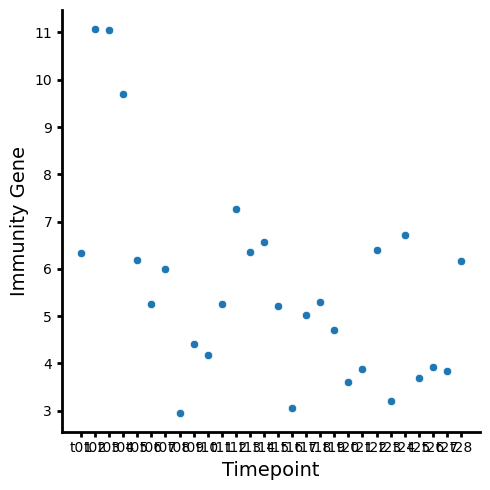

In [62]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=diversity_series.index,
    y=groupby_timepoint["AT1G64280"],
)
plt.xlabel("Timepoint", fontsize=14)
plt.ylabel("Immunity Gene", fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

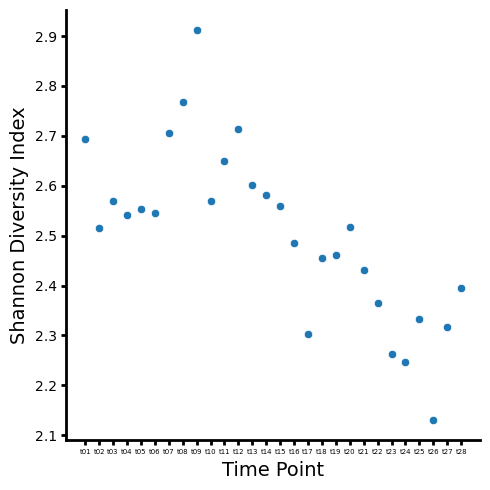

In [63]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(x=diversity_series.index, y=diversity_series, palette="viridis")
plt.xlabel("Time Point", fontsize=14)
plt.ylabel("Shannon Diversity Index", fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=5,
)  # rotation=90
plt.yticks(fontsize=10)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

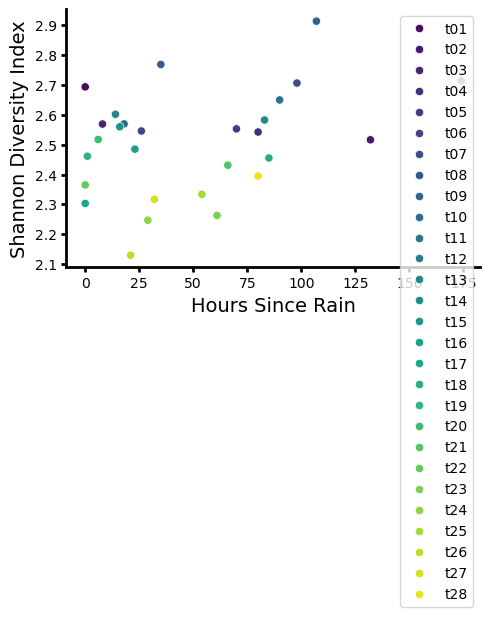

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=timepoint_time_since_rain["Hours Since Rain"],
    y=diversity_series,
    hue=diversity_series.index,
    palette="viridis",
)
plt.xlabel("Hours Since Rain", fontsize=14)
plt.ylabel("Shannon Diversity Index", fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

In [66]:
scipy.stats.pearsonr(
    timepoint_time_since_rain["Hours Since Rain"],
    diversity_series,
)
##light rain .35 pearson
## moderate rain .31 pearson
## heavy rain .188

PearsonRResult(statistic=np.float64(0.3549586886628698), pvalue=np.float64(0.06380934078458762))

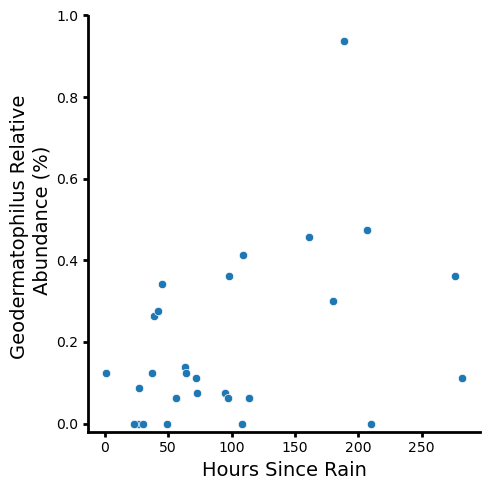

In [67]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=timepoint_time_since_rain["Hours Since Rain"],
    y=timepoint_abundance_matrix["Geodermatophilus"],
)
plt.xlabel("Hours Since Rain", fontsize=14)
plt.ylabel("Geodermatophilus Relative \n Abundance (%)", fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)
plt.ylim(-0.02, 1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

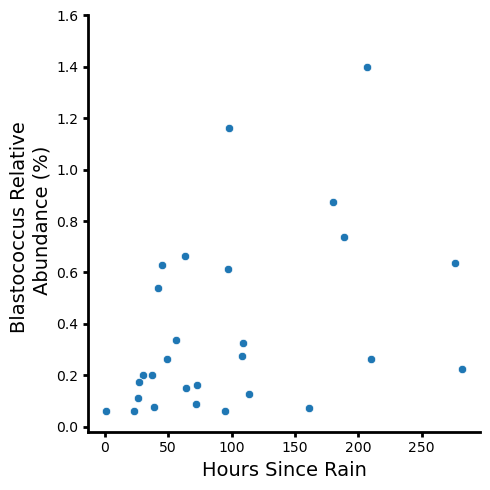

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=timepoint_time_since_rain["Hours Since Rain"],
    y=timepoint_abundance_matrix["Blastococcus"],
)
plt.xlabel("Hours Since Rain", fontsize=14)
plt.ylabel("Blastococcus Relative \n Abundance (%)", fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)
plt.ylim(-0.02, 1.6)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

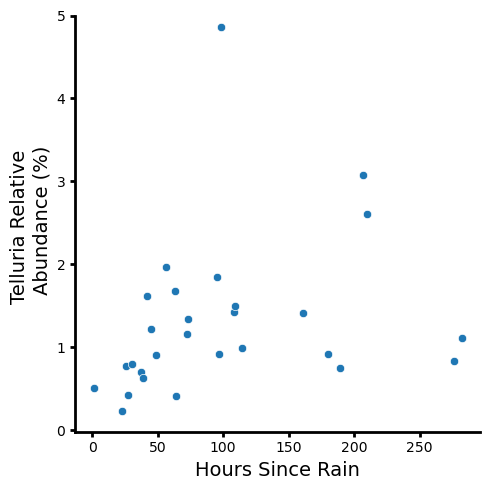

In [69]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=timepoint_time_since_rain["Hours Since Rain"],
    y=timepoint_abundance_matrix["Telluria_573210"],
)
plt.xlabel("Hours Since Rain", fontsize=14)
plt.ylabel("Telluria Relative \n Abundance (%)", fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)
plt.ylim(-0.02, 5)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

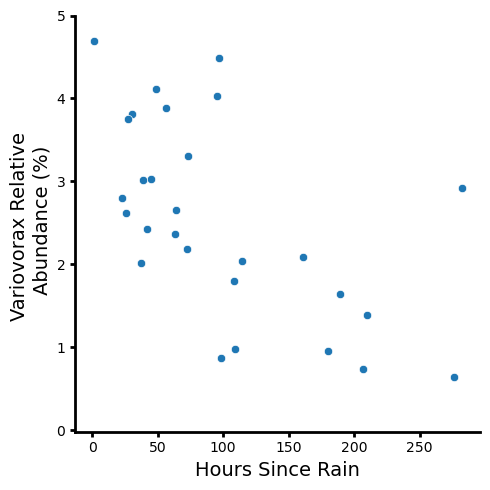

In [70]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=timepoint_time_since_rain["Hours Since Rain"],
    y=timepoint_abundance_matrix["Variovorax"],
)
plt.xlabel("Hours Since Rain", fontsize=14)
plt.ylabel("Variovorax Relative \n Abundance (%)", fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)
plt.ylim(-0.02, 5)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

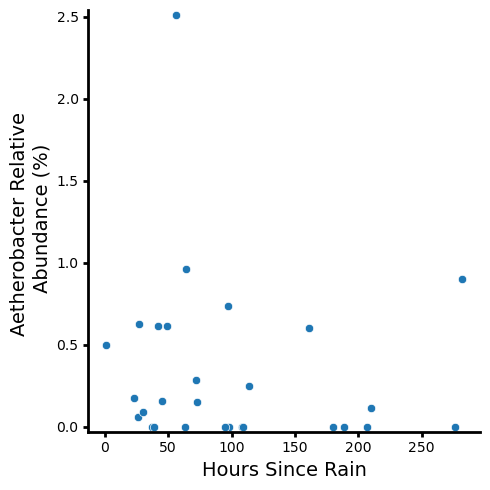

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=timepoint_time_since_rain["Hours Since Rain"],
    y=timepoint_abundance_matrix["Aetherobacter"],
)
plt.xlabel("Hours Since Rain", fontsize=14)
plt.ylabel("Aetherobacter Relative \n Abundance (%)", fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)
plt.ylim(-0.03, 2.54)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

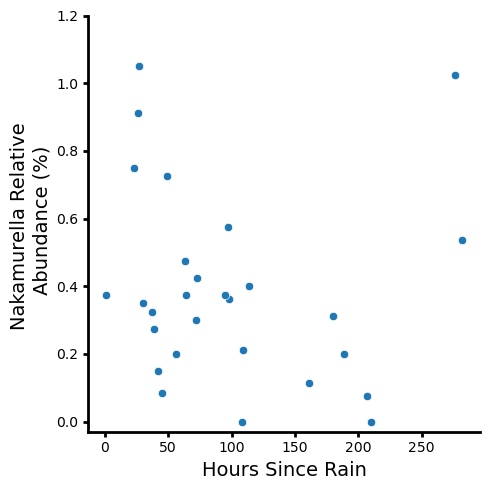

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=timepoint_time_since_rain["Hours Since Rain"],
    y=timepoint_abundance_matrix["Nakamurella"],
)
plt.xlabel("Hours Since Rain", fontsize=14)
plt.ylabel("Nakamurella Relative \n Abundance (%)", fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)
plt.ylim(-0.03, 1.2)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

In [ ]:
rain_correlation_with_abundance

In [ ]:
rain_correlation_with_genes_pearson = groupby_timepoint.corrwith(
    timepoint_time_since_rain["Hours Since Rain"],
)

In [ ]:
rain_correlation_with_genes_pearson.sort_values(ascending=False).head(30)

In [ ]:
rain_correlation_with_genes_spearman = groupby_timepoint.corrwith(
    timepoint_time_since_rain["Hours Since Rain"], method="spearman"
)

In [ ]:
rain_correlation_with_genes_spearman.sort_values(ascending=False).head(30)

In [ ]:
timepoint_abundance_matrix

In [ ]:
groupby_timepoint

In [ ]:
type(timepoint_time_since_rain["Time Since Rain"][4])

In [ ]:
timepoint_time_since_rain["Time Since Rain"].days

In [ ]:
len(list_of_time_since_rain)

In [ ]:
rain_events_in_past.index.max()

In [ ]:
time_since_all_rain >= dt.timedelta(seconds=0)

In [ ]:
luke_rain_events.index[0]

In [ ]:
- 


In [ ]:
time_delta = luke_rain_events.index[0] - long_term_metadata["Date and Time"].iloc[0]

In [ ]:
time_delta

In [ ]:
time_delta > dt.timedelta(seconds=0)